In [ ]:
#Linear regression machine learning model to predict Target variable - By vinayak Bhosale

In [1]:
#importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data set

In [2]:
df = pd.read_csv("C:\\Users\\Pinky\\Desktop\\python\\data sets\\datasets_24824_33185_anscombe.csv")

In [3]:
#checking the head and tail of it

In [3]:
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [4]:
df.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [5]:
df["dataset"].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [4]:
#checking the information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
dataset    44 non-null object
x          44 non-null float64
y          44 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [5]:
#as you can see data set cloumn is object type we need to convert it to integer type

In [11]:
newcol = pd.get_dummies(df["dataset"],drop_first=True)

In [14]:
df = pd.concat([df,newcol],axis=1)

In [16]:
df.drop("dataset",axis=1,inplace=True)

In [17]:
df.head()

,x,y,II,III,IV
0,10.0,8.04,0,0,0
1,8.0,6.95,0,0,0
2,13.0,7.58,0,0,0
3,9.0,8.81,0,0,0
4,11.0,8.33,0,0,0


In [18]:
df.tail()

,x,y,II,III,IV
39,8.0,5.25,0,0,1
40,19.0,12.50,0,0,1
41,8.0,5.56,0,0,1
42,8.0,7.91,0,0,1
43,8.0,6.89,0,0,1


In [6]:
#after conversion we call describe method to check mean, std, count etc

In [41]:
df.describe()

,x,y,II,III,IV
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,9.000000,7.500682,0.250000,0.250000,0.250000
std,3.198837,1.958925,0.438019,0.438019,0.438019
min,4.000000,3.100000,0.000000,0.000000,0.000000
25%,7.000000,6.117500,0.000000,0.000000,0.000000
50%,8.000000,7.520000,0.000000,0.000000,0.000000
75%,11.000000,8.747500,0.250000,0.250000,0.250000
max,19.000000,12.740000,1.000000,1.000000,1.000000


In [7]:
#checking the correlation

In [42]:
df.corr()

,x,y,II,III,IV
x,1.000000,0.816366,0.000000,0.000000,0.000000
y,0.816366,1.000000,0.000068,-0.000203,0.000068
II,0.000000,0.000068,1.000000,-0.333333,-0.333333
III,0.000000,-0.000203,-0.333333,1.000000,-0.333333
IV,0.000000,0.000068,-0.333333,-0.333333,1.000000


In [8]:
#plotting the correlation

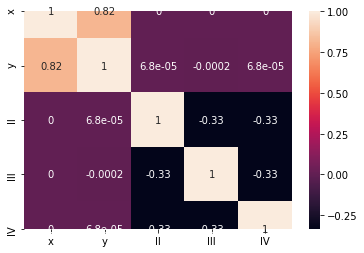

In [47]:
plt.tight_layout()
plt.plot(figsize = (10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
#plotting mean, std, count

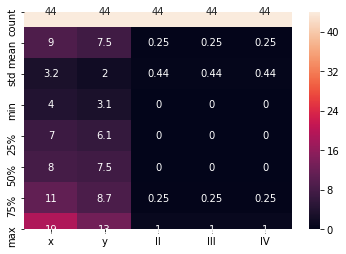

In [48]:
sns.heatmap(df.describe(),annot=True)

In [10]:
#plotting the whole data set to check the behaviour

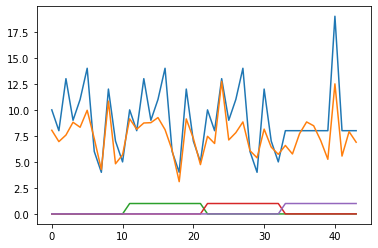

In [22]:
plt.plot(df)

In [11]:
#checking the realtion between x and y column

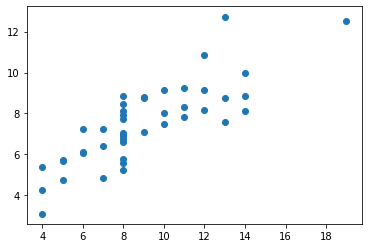

In [24]:
plt.scatter(df["x"],df["y"])


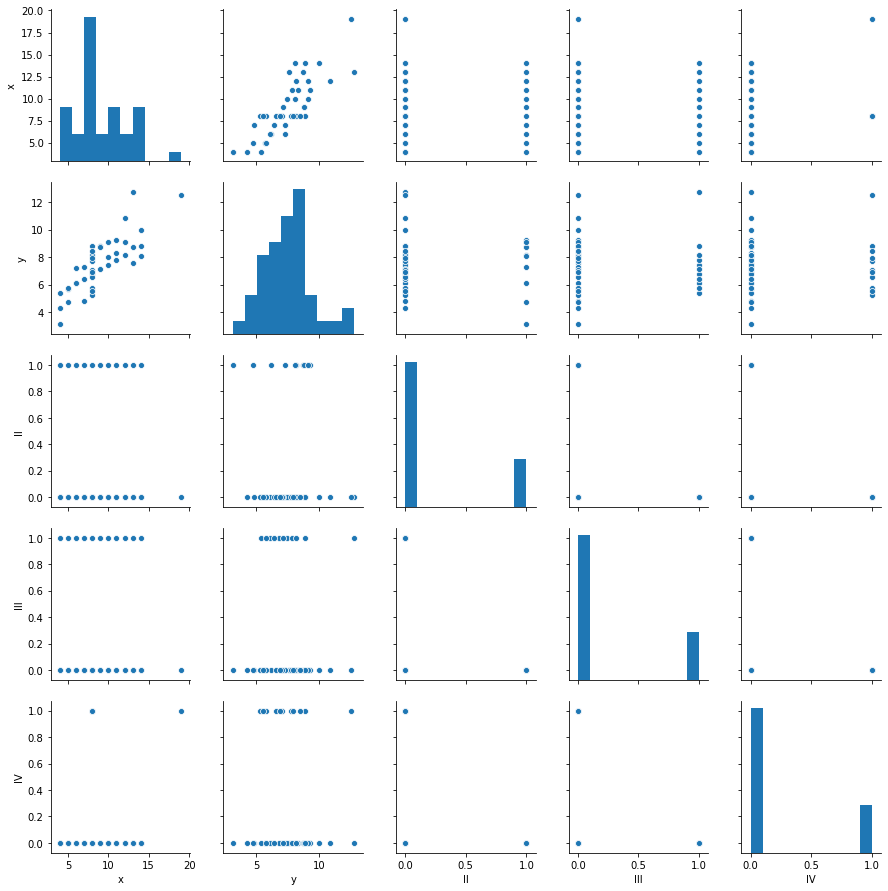

In [26]:
sns.pairplot(df)

In [28]:
df.head(2)

,x,y,II,III,IV
0,10.0,8.04,0,0,0
1,8.0,6.95,0,0,0


In [12]:
#splitting the data into x and y variables

In [29]:
X = df.drop("y",axis=1)
Y = df["y"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=101)

In [13]:
#building the linear regression model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [14]:
#training the model

In [34]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#making predictions

In [35]:
predictions = model.predict(X_test)

In [36]:
from sklearn import metrics

In [16]:
#checking accuracy

In [37]:
print(metrics.mean_absolute_error(Y_test,predictions))
print("\n")
print(metrics.mean_squared_error(Y_test,predictions))
print("\n")
print(np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

1.03412907228637


1.6862888781733298


1.2985718609970454


In [38]:
print(model.intercept_)

2.811325951164105


In [39]:
print(model.coef_)

[0.50546422 0.45699602 0.17211906 0.28384914]


In [17]:
#as we can see the truth y value and predictions have linear relationship, so we can conclude that our model did good predictions

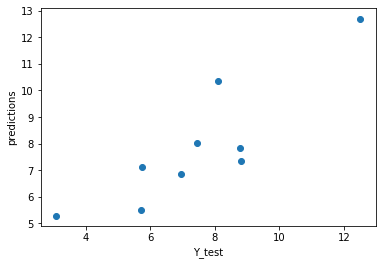

In [40]:
plt.scatter(Y_test,predictions)
plt.xlabel("Y_test")
plt.ylabel("predictions")
plt.show()